In [45]:
#import
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x) #Set the pandas display format to suppress scientific notation
import matplotlib.pyplot as plt
import seaborn as sns

#import data
df = pd.read_csv("data/binary_state_kickstarter_projects.csv")
df.head()

,category,subcategory,country,launched,deadline,goal,pledged,backers,state,duration,launch_month,org_state,country_encoded,category_encoded,subcategory_encoded,goal_log,pledged_log
0,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,0,39,4,Failed,21,5,52,6.909,6.439
1,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,0,87,4,Failed,21,6,129,11.290,3.135
2,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,1,8,4,Successful,21,0,70,3.045,3.584
3,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,1,79,4,Successful,21,13,131,4.605,4.984
4,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,0,28,4,Failed,21,5,52,7.550,5.961


In [46]:
columns_to_drop = ['category','subcategory','country','launched', 'deadline']
df.drop(columns=columns_to_drop, inplace=True, axis=1)
df.head()

,goal,pledged,backers,state,duration,launch_month,org_state,country_encoded,category_encoded,subcategory_encoded,goal_log,pledged_log
0,1000,625,30,0,39,4,Failed,21,5,52,6.909,6.439
1,80000,22,3,0,87,4,Failed,21,6,129,11.290,3.135
2,20,35,3,1,8,4,Successful,21,0,70,3.045,3.584
3,99,145,25,1,79,4,Successful,21,13,131,4.605,4.984
4,1900,387,10,0,28,4,Failed,21,5,52,7.550,5.961


In [47]:
x = df['state'].value_counts()
x_male_percentage = int(x[1]/len(df) * 100)
x_female_percentage = int(x[0]/len(df) * 100)
print(f'Successful: {x_male_percentage}% \nFailed: {x_female_percentage}%')

Successful: 35% 
Failed: 64%


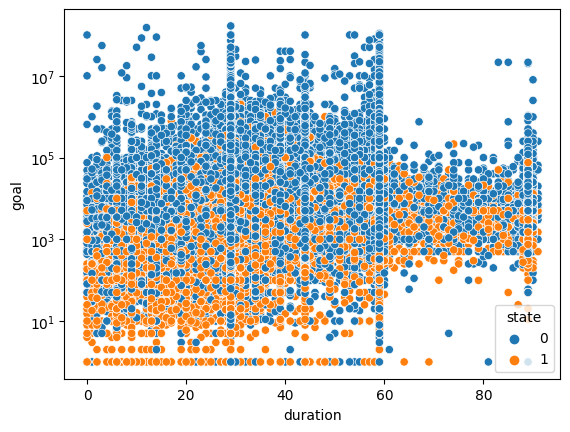

In [48]:
#Plotting goal and pledged
ax = sns.scatterplot(data=df, x='duration',y='goal', hue='state')
#plt.xscale('log')
plt.yscale('log')

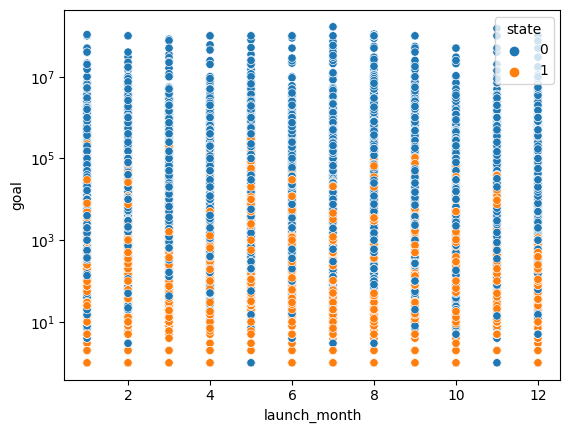

In [49]:
#Plotting goal and pledged
ax = sns.scatterplot(data=df, x='launch_month',y='goal', hue='state')
#plt.xscale('log')
plt.yscale('log')

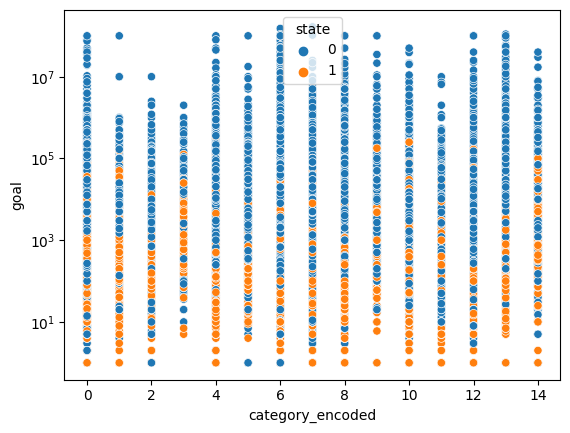

In [50]:
#Plotting goal and pledged
ax = sns.scatterplot(data=df, x='category_encoded',y='goal', hue='state')
#plt.xscale('log')
plt.yscale('log')

In [62]:
from sklearn.cluster import KMeans
 
X = df[['duration']]
y = ['state']

algorithm = KMeans(n_clusters=2)
y_means = algorithm.fit_predict(X)

/Users/rouvenpampus/Desktop/neuefische/repos/kickstart_masters/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [63]:
df_cluster = pd.Series(y_means, name='Cluster')
df_clustered = pd.concat([df, df_cluster], axis=1)
df_clustered

,goal,pledged,backers,state,duration,launch_month,org_state,country_encoded,category_encoded,subcategory_encoded,goal_log,pledged_log,Cluster
0,1000,625,30,0,39,4,Failed,21,5,52,6.909,6.439,0
1,80000,22,3,0,87,4,Failed,21,6,129,11.290,3.135,1
2,20,35,3,1,8,4,Successful,21,0,70,3.045,3.584,0
3,99,145,25,1,79,4,Successful,21,13,131,4.605,4.984,1
4,1900,387,10,0,28,4,Failed,21,5,52,7.550,5.961,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
372046,392,514,6,1,2,12,Successful,0,10,68,5.974,6.244,0
372047,100000,0,0,0,19,12,Canceled,21,9,151,11.513,0.000,0
372048,1000,1,1,0,4,12,Canceled,21,8,136,6.909,0.693,0
372049,136,78,6,0,13,1,Canceled,20,1,25,4.920,4.369,0


In [64]:
# Print accuracy score 
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
print("Accuracy:", accuracy_score(df_clustered['state'], df_clustered['Cluster']).round(2))

Accuracy: 0.55


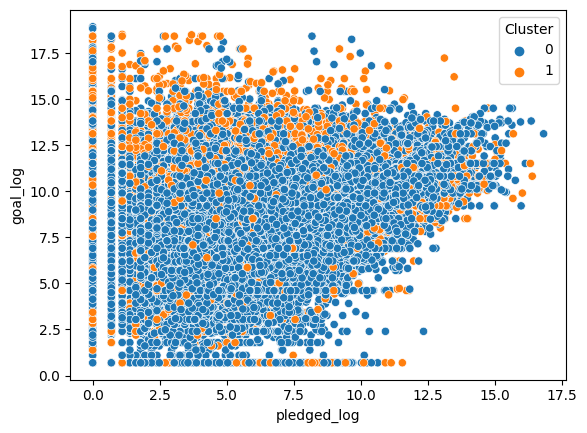

In [65]:
ax = sns.scatterplot(data=df_clustered, x='pledged_log',y='goal_log', hue='Cluster')